In [76]:
import sys
from pathlib import Path
import pandas as pd
import os
from dotenv import load_dotenv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime

PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))
load_dotenv(dotenv_path=os.path.abspath("../.env"))  # hoặc đường dẫn tuyệt đối đến file .env
from src.mongo_client import MongoDBClient
mongo = MongoDBClient()
print("MONGO_COLLECTION =", os.getenv("MONGO_COLLECTION"))
posts = mongo.fetch_posts()


2025-12-27 11:17:53 | mongodb | INFO | Connected to Atlas: DB [batdongsanvn] | Collection [properties_post]


MONGO_COLLECTION = properties_post


# chuyển thành dataframe để trực quan

In [77]:
df = pd.DataFrame(posts)
df = pd.json_normalize(posts, sep=".")
df

,post_id,property_url,transaction_type,property_category,title,address,latitude,longitude,price,price_per_spm,...,spec.num_floor,project_info.price,spec.orientation,spec.balcony_direction,spec.exdate,spec.electricity,spec.water,spec.internet,spec.utilities,verified_status
0,44743692,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,sale,Apartment,Quá Đẳng Cấp! Sở hữu view triệu đô tại Masteri...,"Masteri Park Place, Phường An Phú, Quận 2, Hồ ...",10.805915,106.771332,"5,9 tỷ","~103,51 triệu/m²",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44858378,https://batdongsan.com.vn/ban-dat-pho-hoa-binh...,sale,Land Plot,"Bán đất tại phố Hòa Bình, Thanh Miếu, Phú Thọ ...","Phố Hòa Bình 1, Phường Thanh Miếu, Việt Trì, P...",21.304535,105.430847,9 tỷ,"~34,09 triệu/m²",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,43808260,https://batdongsan.com.vn/ban-nha-biet-thu-lie...,sale,Villa/Townhouse,"Quỹ hàng đợt cuối chiết khấu 18%, tặng xe điện...","Vinhomes Wonder City, Tân Hội, Đan Phượng, Hà Nội",21.096050,105.711611,"15,6 tỷ",~150 triệu/m²,...,4 tầng,"18 - 30,53 triệu/m²",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,41625586,https://batdongsan.com.vn/ban-nha-biet-thu-lie...,sale,Villa/Townhouse,"Bán nhà biệt thự tại Swan Bay, 23.2 tỷ VND, 32...","Dự án Swan Bay, Xã Đại Phước, Nhơn Trạch, Đồng...",10.740804,106.832996,"23,2 tỷ","~72,5 triệu/m²",...,NaN,"18 - 30,53 triệu/m²",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,44791640,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,sale,Apartment,"Chính chủ cần bán gấp: Studio 2,1 tỷ, 1PN 3,1 ...","The Sapphire-Vinhomes Smart City, Tây Mỗ, Nam ...",21.005967,105.736738,"4,3 tỷ","~78,18 triệu/m²",...,NaN,NaN,Tây - Bắc,Đông - Nam,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32374,44249616,https://batdongsan.com.vn/cho-thue-can-ho-chun...,rent,Mini Apartment,"Cho thuê căn hộ mini 1PN, 1WC, 35m2 giá siêu h...","Dự án Nam Long II Central Lake, Đường N6, Phườ...",9.994505,105.775558,5 triệu/tháng,NaN,...,NaN,"3,8 - 5,93 triệu/tháng",Đông - Nam,NaN,1 - 2 tuần,Do chủ nhà quy định,Do chủ nhà quy định,Thỏa thuận,"Camera, PCCC",unverified
32375,44348003,https://batdongsan.com.vn/cho-thue-nha-rieng-d...,rent,Private House,(Chủ gửi) cho thuê nhà 1 trệt 1 lầu 2PN KDC Hư...,"Dự án Hưng Phú, Đường Quang Trung, Phường Hưng...",10.011840,105.789429,10 triệu/tháng,Mặt tiền 4.5 m,...,2 tầng,"33,7 - 62,6 triệu/tháng",Đông - Nam,Đông - Nam,1 tháng,Theo nhà cung cấp,Theo nhà cung cấp,Thỏa thuận,NaN,unverified
32376,44902432,https://batdongsan.com.vn/cho-thue-nha-mat-pho...,rent,Storefront House,"Cho thuê nhà mặt phố Chùa Láng, 270 triệu, 130...","Phố Chùa Láng, Phường Láng Thượng, Đống Đa, ...",21.023217,105.805837,270 triệu/tháng,Mặt tiền 18 m,...,4 tầng,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unverified
32377,44902423,https://batdongsan.com.vn/cho-thue-nha-mat-pho...,rent,Storefront House,"Cho thuê nhà mặt phố Vũ Tông Phan, 70 triệu, 7...","Phố Vũ Tông Phan, Phường Khương Trung, Thanh X...",20.998293,105.817121,70 triệu/tháng,Mặt tiền 6.6 m,...,4 tầng,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unverified


# Tổng quan dữ liệu

In [78]:
df.columns.tolist()

['post_id',
 'property_url',
 'transaction_type',
 'property_category',
 'title',
 'address',
 'latitude',
 'longitude',
 'price',
 'price_per_spm',
 'area',
 'description',
 'images',
 'date_posted',
 'date_expired',
 'news_type',
 'verified',
 'scraped_at',
 'spec.bedroom',
 'spec.bathroom',
 'spec.legal',
 'spec.furniture',
 'project_info.name',
 'project_info.status',
 'project_info.investor',
 'project_info.image',
 'project_info.project_url',
 'project_info.listing_count',
 'contact_info.name',
 'contact_info.profile_url',
 'contact_info.avatar_url',
 'contact_info.phone_invisible',
 'contact_info.zalo_url',
 'contact_info.join_duration',
 'contact_info.listings',
 'spec.front_width',
 'spec.road_width',
 'spec.num_floor',
 'project_info.price',
 'spec.orientation',
 'spec.balcony_direction',
 'spec.exdate',
 'spec.electricity',
 'spec.water',
 'spec.internet',
 'spec.utilities',
 'verified_status']

# Xử lý dữ liệu cơ bản trước khi trực quan

## xử lý trùng lặp

In [ ]:

# Giả sử df_sale là DataFrame chứa dữ liệu
duplicates = (
    df.groupby(["address", "area", "price"])
    .agg(count=("post_id", "count"), posts=("post_id", list))
    .reset_index()
)

# Lọc ra những nhóm có nhiều hơn 1 tin
duplicates = duplicates[duplicates["count"] > 1]

print(duplicates)


In [ ]:
# Giữ lại duy nhất 1 dòng cho mỗi bất động sản, xóa các dòng trùng lặp
df = df.drop_duplicates(
    subset=["address", "area_float", "price_million"],
    keep="first"   # giữ lại dòng đầu tiên, có thể đổi thành "last"
)


## chia thành các df nhỏ để tiện xử lý riêng

In [79]:
df_sale = df[df["transaction_type"] == "sale"]
df_rent = df[df["transaction_type"] == "rent"].drop(columns=["price_per_spm"])

In [81]:
# XỬ LÝ DIỆN TÍCH CHUNG CHO CẢ 2 DATAFRAME
def convert_area_shared(x):
    if pd.isna(x): return np.nan, "valid"
    
    # 1. Chuẩn hóa: đổi phẩy thành chấm và xóa khoảng trắng
    text = str(x).lower().strip().replace(",", ".")
    
    # 2. Logic theo yêu cầu: Nếu có từ 2 dấu chấm trở lên, bỏ các dấu chấm đầu, giữ lại dấu chấm cuối
    if text.count('.') > 1:
        parts = text.split('.')
        text = "".join(parts[:-1]) + "." + parts[-1]
    
    # 3. Trích xuất số bằng Regex
    try:
        match = re.search(r"(\d+\.?\d*)", text)
        if not match: return np.nan, "error"
        
        val = float(match.group(1))
        return val, "valid"
    except:
        return np.nan, "error"

# Áp dụng cho df
area_results = df["area"].apply(convert_area_shared)
df["area"] = [x[0] for x in area_results]
df["area_status"] = [x[1] for x in area_results]

# XÓA CÁC DÒNG LỖI DIỆN TÍCH (vd: dòng không có số hoặc định dạng không thể convert)
df = df[df["area_status"] == "valid"].drop(columns=["area_status"])

In [82]:
def split_address(addr):
    if pd.isna(addr): return None, None, None
    parts = [p.strip() for p in str(addr).split(',')]
    province = parts[-1] if len(parts) >= 1 else None
    district = parts[-2] if len(parts) >= 2 else None
    ward = parts[-3] if len(parts) >= 3 else None
    return ward, district, province

df[['ward', 'district', 'province']] = df['address'].apply(lambda x: pd.Series(split_address(x)))

In [83]:
# chuyển cột date_posted về dạng datetime
df["date_posted"] = pd.to_datetime(df["date_posted"], errors="coerce", dayfirst=True)


In [84]:
df_rent = df[df["transaction_type"] == "rent"].copy()
df_sale = df[df["transaction_type"] == "sale"].copy()

In [85]:
def convert_price_sale(x):
    if pd.isna(x): return np.nan, "valid"
    text = str(x).lower().strip().replace(",", ".")
    if "thỏa thuận" in text: return np.nan, "negotiable"
    
    try:
        match = re.search(r"(\d+\.?\d*)", text)
        if not match or "/m" in text: return np.nan, "error" # Xóa dòng có /m2 trong giá tổng
        
        num = float(match.group(1))
        if "tỷ" in text: return num * 1000, "valid"
        if "triệu" in text: return num, "valid"
        return num, "valid"
    except:
        return np.nan, "error"

res_sale = df_sale["price"].apply(convert_price_sale)
df_sale["price"] = [x[0] for x in res_sale]
df_sale["price_status"] = [x[1] for x in res_sale]

# Xóa dòng lỗi giá ở df_sale
df_sale = df_sale[df_sale["price_status"] != "error"].drop(columns=["price_status"])

In [86]:
def convert_price_rent(x):
    if pd.isna(x): return np.nan, "valid"
    text = str(x).lower().strip().replace(",", ".")
    if "thỏa thuận" in text: return np.nan, "negotiable"
    
    try:
        # Lấy số đầu tiên (thường là triệu)
        match = re.findall(r"(\d+\.?\d*)", text)
        if not match: return np.nan, "error"
        
        return float(match[0]), "valid"
    except:
        return np.nan, "error"

res_rent = df_rent["price"].apply(convert_price_rent)
df_rent["price"] = [x[0] for x in res_rent]
df_rent["price_status"] = [x[1] for x in res_rent]

# Xóa dòng lỗi giá ở df_rent
df_rent = df_rent[df_rent["price_status"] != "error"].drop(columns=["price_status"])

In [87]:
# tính cột price_per_spm
df_sale["price_per_spm"] = df_sale["price"] / df_sale["area"]


In [88]:
df_rent['price'].describe()

count    12945.000000
mean        47.346294
std         87.614971
min          1.000000
25%          8.000000
50%         16.000000
75%         41.000000
max        990.000000
Name: price, dtype: float64

# TRỰC QUAN

## DASHBOARD chung

C:\Users\Admin\AppData\Local\Temp\ipykernel_19796\1344063496.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='transaction_type', ax=axes[0, 0], palette=['#3498db', '#e74c3c'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_19796\1344063496.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='transaction_type', y='area', ax=axes[0, 1], palette=['#3498db', '#e74c3c'], errorbar=None)
C:\Users\Admin\AppData\Local\Temp\ipykernel_19796\1344063496.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=verified_rate.index, 

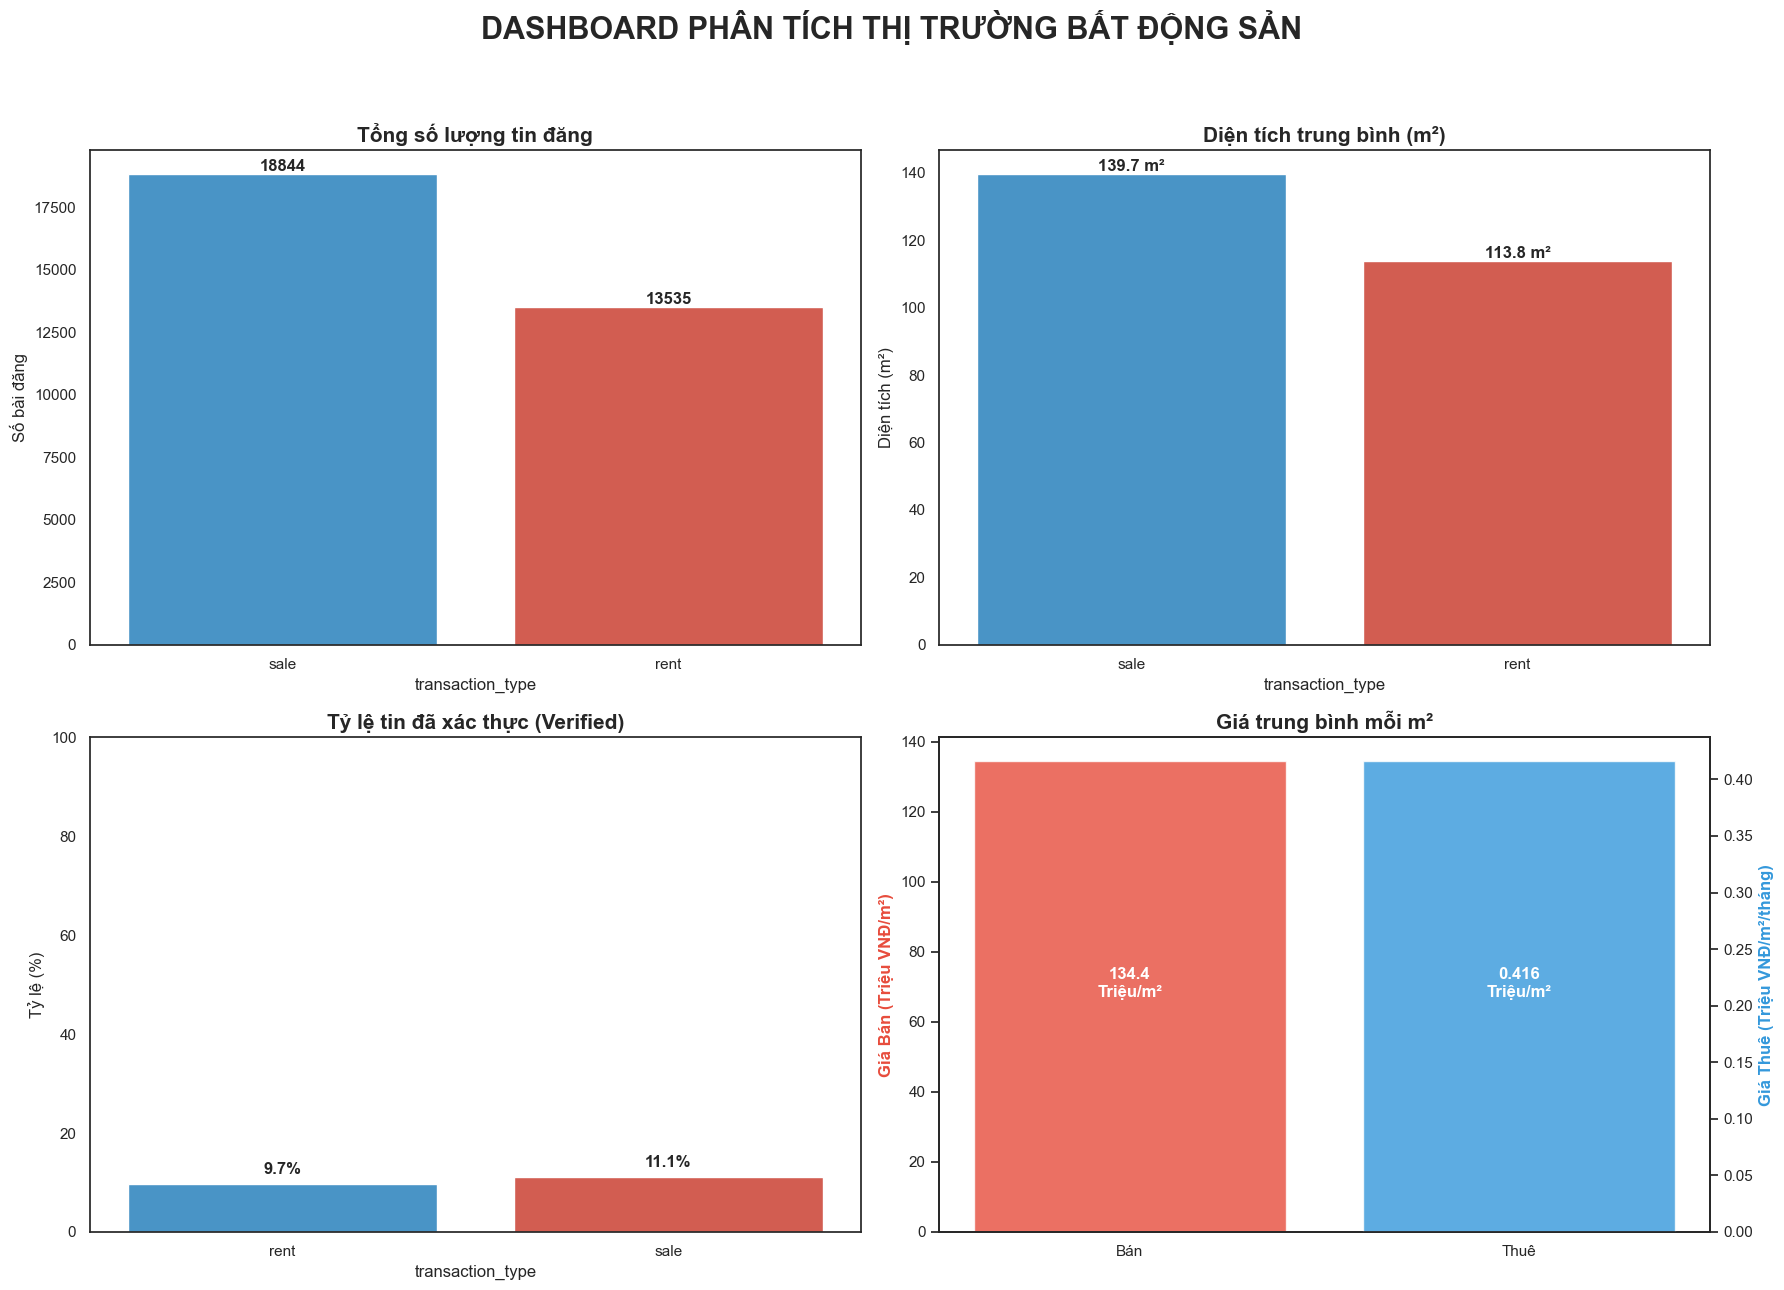

In [ ]:

# Thiết lập thông số chung
sns.set_theme(style="white")
plt.rcParams['font.sans-serif'] = ['Arial'] # Đảm bảo hiển thị tốt

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('DASHBOARD PHÂN TÍCH THỊ TRƯỜNG BẤT ĐỘNG SẢN', fontsize=22, fontweight='bold', y=0.95)

# --- 1. TỔNG SỐ TIN ĐĂNG (GỘP) ---
sns.countplot(data=df, x='transaction_type', ax=axes[0, 0], palette=['#3498db', '#e74c3c'])
axes[0, 0].set_title('Tổng số lượng tin đăng', fontsize=15, fontweight='bold')
axes[0, 0].set_ylabel('Số bài đăng')
for p in axes[0, 0].patches:
    axes[0, 0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontsize=12, fontweight='bold')

# --- 2. DIỆN TÍCH TRUNG BÌNH (GỘP) ---
sns.barplot(data=df, x='transaction_type', y='area', ax=axes[0, 1], palette=['#3498db', '#e74c3c'], errorbar=None)
axes[0, 1].set_title('Diện tích trung bình (m²)', fontsize=15, fontweight='bold')
axes[0, 1].set_ylabel('Diện tích (m²)')
for p in axes[0, 1].patches:
    axes[0, 1].annotate(f'{p.get_height():.1f} m²', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontsize=12, fontweight='bold')

# --- 3. TỶ LỆ TIN ĐÃ XÁC THỰC (GỘP) ---
verified_rate = df.groupby('transaction_type')['verified'].mean() * 100
sns.barplot(x=verified_rate.index, y=verified_rate.values, ax=axes[1, 0], palette=['#3498db', '#e74c3c'])
axes[1, 0].set_title('Tỷ lệ tin đã xác thực (Verified)', fontsize=15, fontweight='bold')
axes[1, 0].set_ylabel('Tỷ lệ (%)')
axes[1, 0].set_ylim(0, 100)
for i, v in enumerate(verified_rate.values):
    axes[1, 0].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

# --- 4. GIÁ TRUNG BÌNH/M2 (TÁCH BIỆT BẰNG TRỤC Y PHỤ) ---
# Tính toán giá m2 cho từng loại
rent_price_m2 = df_rent['price'].mean() / df_rent['area'].mean()
sale_price_m2 = df_sale['price'].mean() / df_sale['area'].mean()

ax4_left = axes[1, 1]
ax4_right = ax4_left.twinx()

# Vẽ cột cho Bán (Trục trái)
bar1 = ax4_left.bar(['Bán'], [sale_price_m2], color='#e74c3c', alpha=0.8, label='Giá Bán')
# Vẽ cột cho Thuê (Trục phải)
bar2 = ax4_right.bar(['Thuê'], [rent_price_m2], color='#3498db', alpha=0.8, label='Giá Thuê')

ax4_left.set_title('Giá trung bình mỗi m²', fontsize=15, fontweight='bold')
ax4_left.set_ylabel('Giá Bán (Triệu VNĐ/m²)', color='#e74c3c', fontweight='bold')
ax4_right.set_ylabel('Giá Thuê (Triệu VNĐ/m²/tháng)', color='#3498db', fontweight='bold')

# Thêm nhãn giá trị trực tiếp
ax4_left.text(0, sale_price_m2/2, f'{sale_price_m2:.1f}\nTriệu/m²', ha='center', color='white', fontweight='bold')
ax4_right.text(1, rent_price_m2/2, f'{rent_price_m2:.3f}\nTriệu/m²', ha='center', color='white', fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.92])
plt.show()

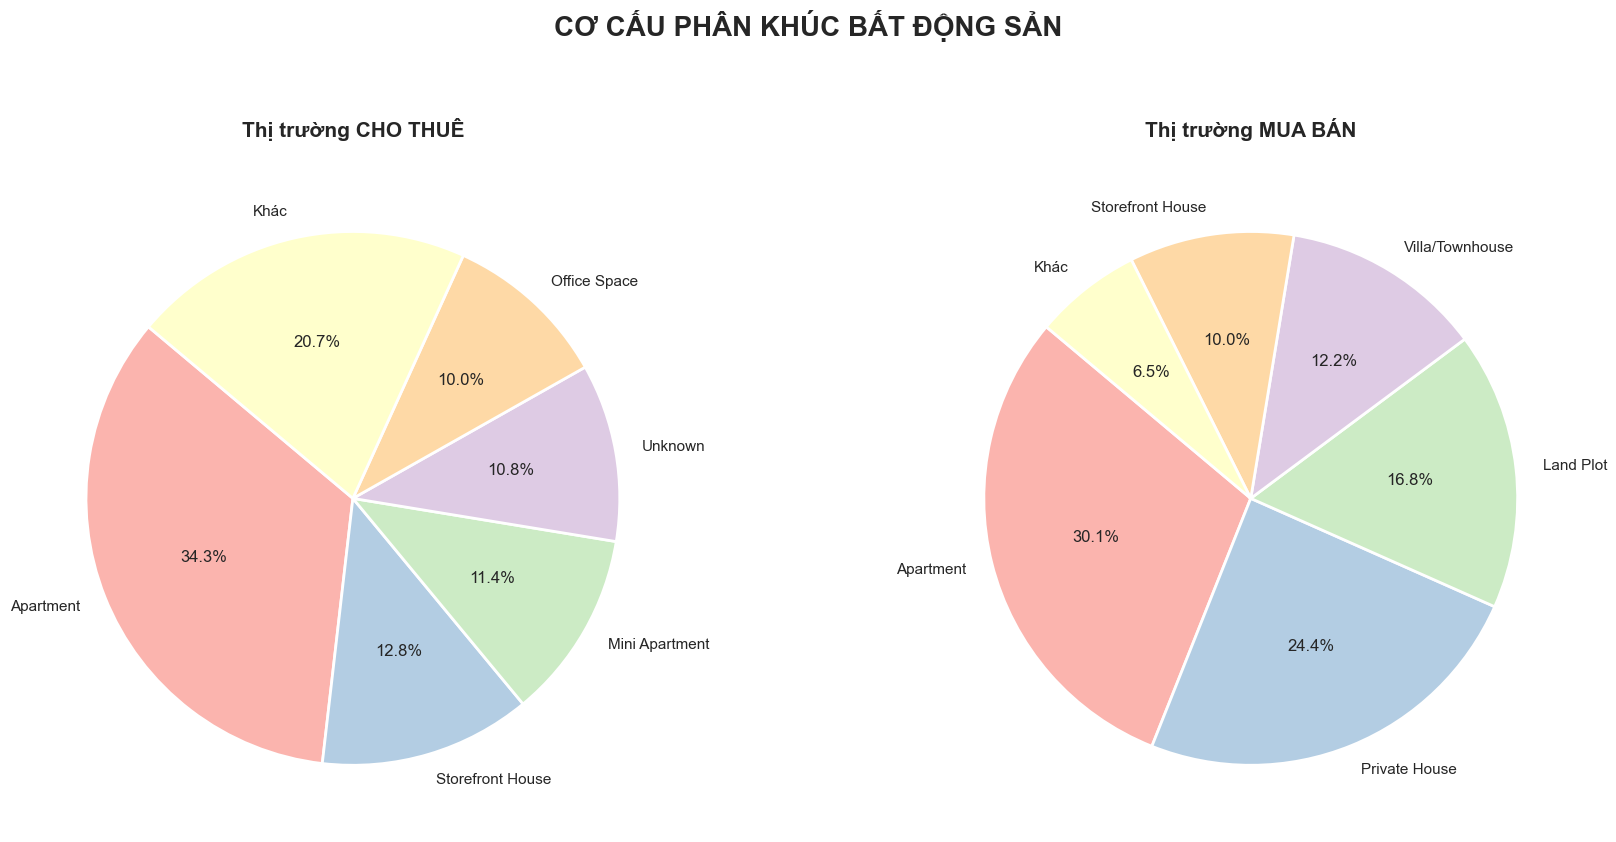

In [94]:


# 1. Chuẩn bị dữ liệu (Lấy top 5 loại hình phổ biến nhất, còn lại gộp vào 'Khác')
def get_category_counts(df, top_n=5):
    counts = df['property_category'].value_counts()
    if len(counts) > top_n:
        top_counts = counts[:top_n]
        others_count = counts[top_n:].sum()
        top_counts['Khác'] = others_count
        return top_counts
    return counts

rent_categories = get_category_counts(df_rent)
sale_categories = get_category_counts(df_sale)

# 2. Thiết lập màu sắc (Sử dụng bảng màu Pastel để dễ nhìn)
colors = plt.get_cmap('Pastel1').colors

# 3. Vẽ biểu đồ
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('CƠ CẤU PHÂN KHÚC BẤT ĐỘNG SẢN', fontsize=20, fontweight='bold', y=1.05)

# Biểu đồ cho Thuê
ax1.pie(rent_categories, labels=rent_categories.index, autopct='%1.1f%%', 
        startangle=140, colors=colors, wedgeprops={'edgecolor': 'white', 'linewidth': 2})
ax1.set_title('Thị trường CHO THUÊ', fontsize=15, fontweight='bold', pad=20)

# Biểu đồ cho Bán
ax2.pie(sale_categories, labels=sale_categories.index, autopct='%1.1f%%', 
        startangle=140, colors=colors, wedgeprops={'edgecolor': 'white', 'linewidth': 2})
ax2.set_title('Thị trường MUA BÁN', fontsize=15, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

In [99]:
df_rent['price'].value_counts()

price
15.00     459
12.00     394
10.00     332
20.00     313
25.00     300
         ... 
142.00      1
493.60      1
117.41      1
425.00      1
295.00      1
Name: count, Length: 569, dtype: int64

In [100]:
# Lọc các dòng có price > 100
df_rent_filtered = df_rent[df_rent["price"] > 100]

# In ra kết quả
print(df_rent_filtered)


        post_id                                       property_url  \
16697  44849280  https://batdongsan.com.vn/cho-thue-nha-mat-pho...   
16727  44670749  https://batdongsan.com.vn/cho-thue-shophouse-n...   
16729  44652029  https://batdongsan.com.vn/cho-thue-van-phong-d...   
16737  44652918  https://batdongsan.com.vn/cho-thue-van-phong-d...   
16744  44570952  https://batdongsan.com.vn/cho-thue-nha-biet-th...   
...         ...                                                ...   
32356  44902503  https://batdongsan.com.vn/cho-thue-nha-mat-pho...   
32363  44902475  https://batdongsan.com.vn/cho-thue-can-ho-chun...   
32371  44902458  https://batdongsan.com.vn/cho-thue-nha-mat-pho...   
32373  44902443  https://batdongsan.com.vn/cho-thue-nha-mat-pho...   
32376  44902432  https://batdongsan.com.vn/cho-thue-nha-mat-pho...   

      transaction_type property_category  \
16697             rent  Storefront House   
16727             rent         Shophouse   
16729             rent     

In [96]:

def plot_dist_with_boxplot(data, title, color, unit):
    # Tạo khung với 2 phần: Boxplot nhỏ ở trên và Histogram ở dưới
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                        gridspec_kw={"height_ratios": (.15, .85)}, 
                                        figsize=(12, 7))
    
    # 1. Vẽ Boxplot
    sns.boxplot(x=data, ax=ax_box, color=color, fliersize=4)
    ax_box.set(xlabel='')
    ax_box.set_title(title, fontsize=16, fontweight='bold', pad=20)
    
    # 2. Vẽ Histogram + Đường KDE (đường cong mật độ)
    sns.histplot(x=data, ax=ax_hist, kde=True, color=color, bins=50)
    ax_hist.set_xlabel(f'Giá ({unit})', fontsize=12)
    ax_hist.set_ylabel('Số lượng bài đăng', fontsize=12)
    
    # Loại bỏ khung thừa để nhìn sạch hơn
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    
    plt.tight_layout()
    plt.show()

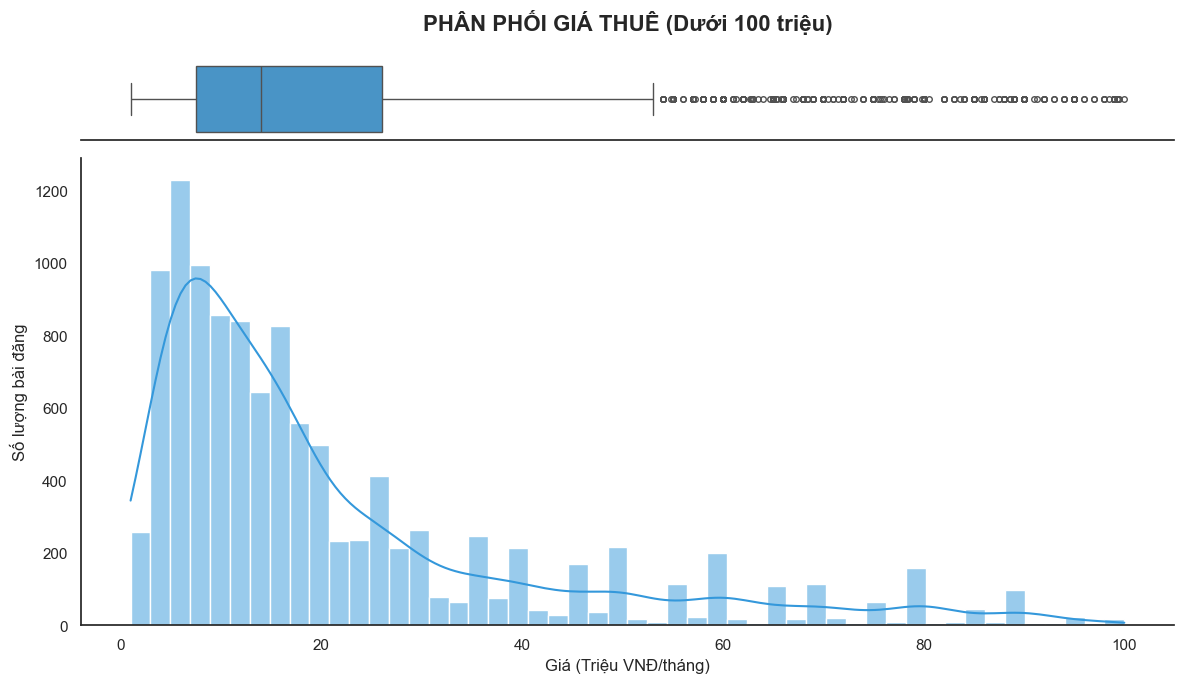

In [97]:
# Thông thường giá thuê tập trung dưới 100 triệu, ta có thể lọc để biểu đồ không bị kéo quá dài bởi 1 vài tin cực lớn
rent_prices = df_rent[df_rent['price'] < 100]['price'].dropna()
plot_dist_with_boxplot(rent_prices, 'PHÂN PHỐI GIÁ THUÊ (Dưới 100 triệu)', '#3498db', 'Triệu VNĐ/tháng')

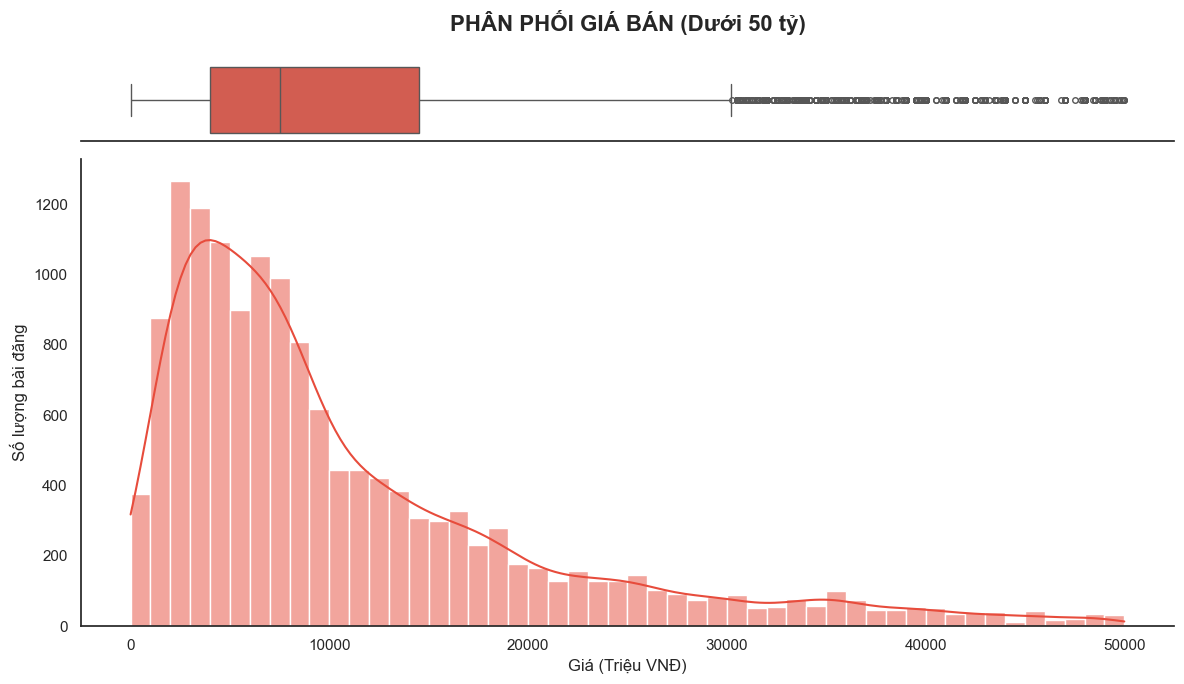

In [98]:
# Lọc các bất động sản dưới 50 tỷ (50,000 triệu) để quan sát vùng giá phổ biến
sale_prices = df_sale[df_sale['price'] < 50000]['price'].dropna()
plot_dist_with_boxplot(sale_prices, 'PHÂN PHỐI GIÁ BÁN (Dưới 50 tỷ)', '#e74c3c', 'Triệu VNĐ')

In [101]:
!pip install folium
import folium
from folium.plugins import HeatMap

# 1. Làm sạch tọa độ
def clean_geo_data(df_input):
    temp_df = df_input.copy()
    # Chuyển về float và loại bỏ NaN
    temp_df['latitude'] = pd.to_numeric(temp_df['latitude'], errors='coerce')
    temp_df['longitude'] = pd.to_numeric(temp_df['longitude'], errors='coerce')
    return temp_df.dropna(subset=['latitude', 'longitude'])

df_geo = clean_geo_data(df) # Sử dụng df tổng để thấy toàn cảnh thị trường

  Using cached folium-0.20.0-py2.py3-none-any.whl.metadata (4.2 kB)
  Using cached branca-0.8.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached xyzservices-2025.11.0-py3-none-any.whl.metadata (4.3 kB)
Using cached folium-0.20.0-py2.py3-none-any.whl (113 kB)
Using cached branca-0.8.2-py3-none-any.whl (26 kB)
Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
Using cached xyzservices-2025.11.0-py3-none-any.whl (93 kB)

   ---------------- ----------------------- 2/5 [jinja2]
   ---------------- ----------------------- 2/5 [jinja2]
   ---------------- ----------------------- 2/5 [jinja2]
   ------------------------ --------------- 3/5 [branca]
   -------------------------------- ------- 4/5 [folium]
   -------------------------------- ------- 4/5 [folium]
   -------------------------------- ------- 4/5 [folium]
   -------------------------------- ------- 4/5 [folium]
   -------------------------------- ------- 4/5 [folium]


In [104]:
# 2. Khởi tạo bản đồ tại vị trí trung tâm của dữ liệu (thường là TP.HCM hoặc Hà Nội)
center_lat = df_geo['latitude'].mean()
center_lon = df_geo['longitude'].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=11, tiles='CartoDB positron')

# 3. Tạo danh sách tọa độ [lat, lon] cho HeatMap
heat_data = [[row['latitude'], row['longitude']] for index, row in df_geo.iterrows()]

# 4. Thêm lớp HeatMap vào bản đồ
HeatMap(heat_data, radius=15, blur=10, min_opacity=0.5).add_to(m)

m.save('heatmap_bat_dong_san.html')

In [105]:
m_compare = folium.Map(location=[center_lat, center_lon], zoom_start=11)

# Lớp Heatmap cho tin THUÊ
geo_rent = clean_geo_data(df_rent)
heat_rent = HeatMap([[r['latitude'], r['longitude']] for i, r in geo_rent.iterrows()], 
                    name='Điểm nóng CHO THUÊ', radius=12, gradient={0.4: 'blue', 0.65: 'lime', 1: 'cyan'})
m_compare.add_child(heat_rent)

# Lớp Heatmap cho tin BÁN
geo_sale = clean_geo_data(df_sale)
heat_sale = HeatMap([[r['latitude'], r['longitude']] for i, r in geo_sale.iterrows()], 
                    name='Điểm nóng MUA BÁN', radius=12, gradient={0.4: 'yellow', 0.65: 'orange', 1: 'red'})
m_compare.add_child(heat_sale)

# Thêm bộ lọc để bật/tắt các lớp
folium.LayerControl().add_to(m_compare)

m_compare.save('heatmap_compare_bat_dong_san.html')